In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import math

In [2]:
data1=pd.read_csv(r"C:\Users\Julian\Desktop\Machine Learning\Projects\Apple Stocks\AAPL.csv")
print(data1.shape)
print(data1.sample(5))
company = 'Apple'
data1['Date'] = pd.to_datetime(data1['Date'])
# data.info()
print(data1)

(10409, 7)
            Date       Open       High        Low      Close  Adj Close  \
8406  2014-04-11  18.535713  18.672501  18.469286  18.557501  16.532526   
6086  2005-01-24   1.267500   1.281786   1.259821   1.263571   1.081964   
6320  2005-12-27   2.642857   2.685000   2.641071   2.651071   2.270044   
6487  2006-08-25   2.405000   2.466071   2.403929   2.455357   2.102459   
6555  2006-12-01   3.278571   3.297500   3.217857   3.261429   2.792678   

         Volume  
8406  271717600  
6086  841629600  
6320  590590000  
6487  543958800  
6555  795079600  
            Date        Open        High         Low       Close   Adj Close  \
0     1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100323   
1     1980-12-15    0.122210    0.122210    0.121652    0.121652    0.095089   
2     1980-12-16    0.113281    0.113281    0.112723    0.112723    0.088110   
3     1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090291   
4     1980-12-18    0.118862  

In [3]:
n = math.floor((data1.shape[0]/2))
data = data1.iloc[n:,:]
# print(data.shape)

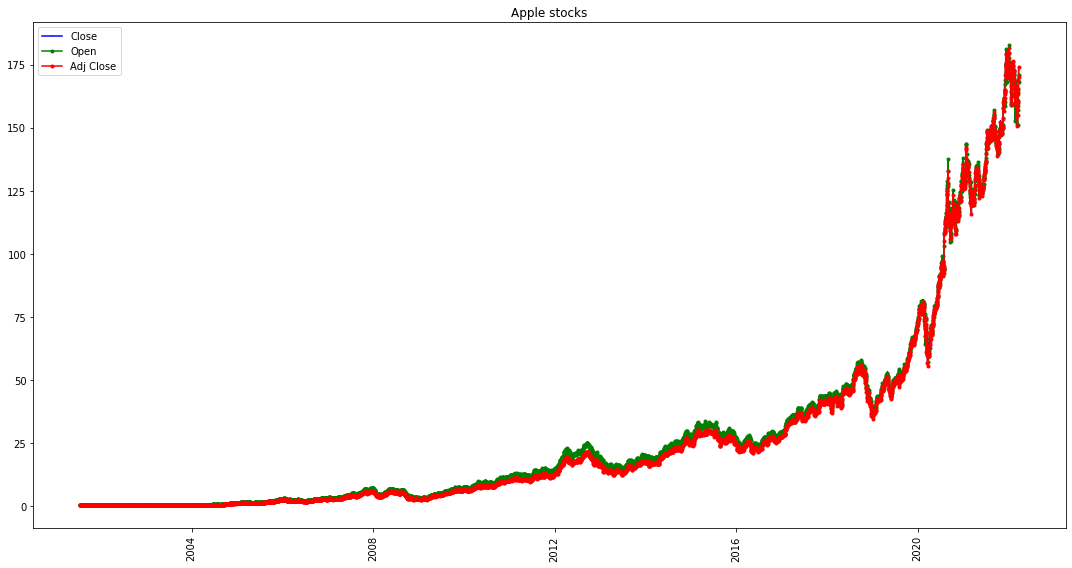

In [4]:
plt.figure(figsize=(15, 8))
c = data
plt.plot(c['Date'], c['Close'], c="b", label="Close", marker=",")
plt.plot(c['Date'], c['Open'], c="g", label="Open", marker=".")
plt.plot(c['Date'], c['Adj Close'], c="r", label="Adj Close", marker=".")
plt.title(company+' stocks')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

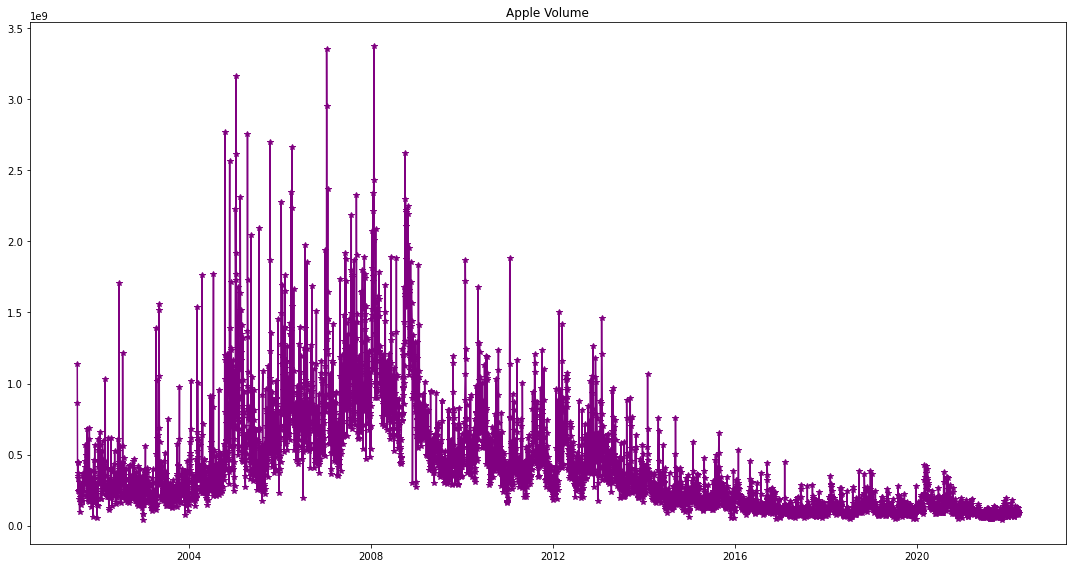

In [5]:
plt.figure(figsize=(15, 8))
c = data
plt.plot(c['Date'], c['Volume'], c='purple', marker='*')
plt.title(f"{company} Volume")
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

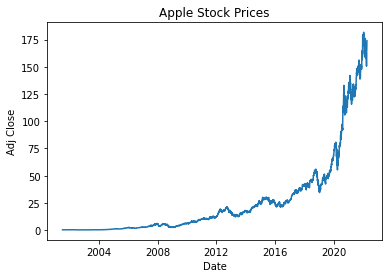

In [6]:
adjusted_data = data.loc[(data['Date'] > datetime(2008,1,1)) & (data['Date'] < datetime(2022,3,24))]
plt.plot(data['Date'],data['Adj Close'])
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Apple Stock Prices")
plt.show

In [7]:
#FIX

In [9]:
close_data = data.filter(['Close'])
# close_data = data['Close']
print(close_data)
dataset = close_data.values
print(dataset)
print(len(dataset))
training = int(np.ceil(len(dataset) * .95))
print(training)

            Close
5204     0.371250
5205     0.356429
5206     0.356786
5207     0.348929
5208     0.340893
...           ...
10404  163.979996
10405  165.380005
10406  168.820007
10407  170.210007
10408  174.070007

[5205 rows x 1 columns]
[[  0.37125 ]
 [  0.356429]
 [  0.356786]
 ...
 [168.820007]
 [170.210007]
 [174.070007]]
5205
4945


In [10]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler scales all values of 'dataset' into range from 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
# print(scaled_data)

train_data = scaled_data[0:int(training), :]
# print(train_data[0:5])
# print(train_data[59:64])

# prepare feature and labels
x_train = []
y_train = []

# This will make a len(train_data)-60 size array 
# with each element being 60 elements from the train_data.
# The first element will be from 0-59 of the train_data, the second would be 1-60, and so on.
for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# print(x_train.shape)
# print(x_train)

In [12]:
import keras
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x0000023B2AD79C70>>

In [13]:
model.compile(optimizer='adam',
			loss='mean_squared_error')
history = model.fit(x_train,
					y_train,
					epochs=10)

Epoch 1/10
153/153 [==============================] - 6s 24ms/step - loss: 0.0025
Epoch 2/10
153/153 [==============================] - 4s 24ms/step - loss: 0.0013
Epoch 3/10
153/153 [==============================] - 4s 24ms/step - loss: 9.9305e-04
Epoch 4/10
153/153 [==============================] - 4s 24ms/step - loss: 9.6338e-04
Epoch 5/10
153/153 [==============================] - 4s 24ms/step - loss: 0.0010
Epoch 6/10
153/153 [==============================] - 4s 24ms/step - loss: 8.2314e-04
Epoch 7/10
153/153 [==============================] - 4s 24ms/step - loss: 8.7115e-04
Epoch 8/10
153/153 [==============================] - 4s 25ms/step - loss: 8.5203e-04
Epoch 9/10
153/153 [==============================] - 4s 24ms/step - loss: 6.8835e-04
Epoch 10/10
153/153 [==============================] - 4s 24ms/step - loss: 7.7495e-04


In [16]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
	x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

9/9 [==============================] - 0s 9ms/step
MSE 132.71141041486615
RMSE 11.520043854728424


<ipython-input-15-5561a31c7b7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


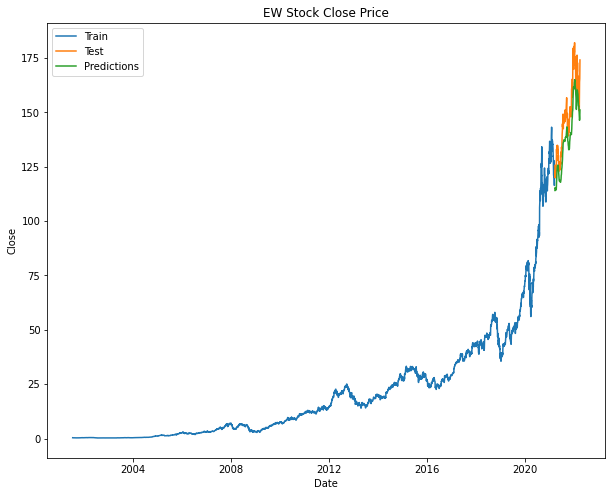

In [15]:
train = data[:training]
test = data[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['Date'], train['Close'])
plt.plot(test['Date'], test[['Close', 'Predictions']])
plt.title('EW Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
